### Netoyage du données 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
data = pd.read_csv('C:/Users/maido/Desktop/CentralSuplec/P3_Santé_Public/en.openfoodfacts.org.products.csv', sep='\t')

C:\Users\maido\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,27,28,29,31,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_colwidth', -1)

<ipython-input-55-0113c8dc5452>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [56]:
data.info() # 2 Go et 1.9 millions de ligne 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911496 entries, 0 to 1911495
Columns: 186 entries, code to carnitine_100g
dtypes: float64(124), int64(2), object(60)
memory usage: 2.6+ GB


In [36]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:origins-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-to-be-c

Suppression des doublons des produit et garder le produit avec le moins de valeurs manquantes

In [123]:
data_=data.copy()

In [124]:
#data['code'].duplicated().sum()
data_['NaN']=data_.isna().sum(axis=1)
data_=data_.sort_values('NaN')
data_=data_.drop_duplicates('code',keep='first')
data_=data_.drop('NaN',axis=1)

In [33]:
# data_=data[~data['code'].duplicated()]  suppression duplicatas aleatoirement

In [125]:
data_.shape

(1911262, 186)

In [6]:
data_.isna().mean().sort_values(ascending=False)
#data['nutrition_grade_fr'].head()

allergens_en                                  1.000000
ingredients_from_palm_oil                     1.000000
cities                                        1.000000
ingredients_that_may_be_from_palm_oil         1.000000
additives                                     1.000000
no_nutriments                                 1.000000
water-hardness_100g                           0.999999
-elaidic-acid_100g                            0.999999
glycemic-index_100g                           0.999998
chlorophyl_100g                               0.999997
-caproic-acid_100g                            0.999997
-caprylic-acid_100g                           0.999997
nutrition-score-uk_100g                       0.999996
-erucic-acid_100g                             0.999995
-capric-acid_100g                             0.999994
-dihomo-gamma-linolenic-acid_100g             0.999994
-lignoceric-acid_100g                         0.999993
-nervonic-acid_100g                           0.999992
-stearic-a

Beaucoup de variable avec des valeurs manquantes. 

In [25]:
data_.dtypes # types de variable 

code                                          object 
url                                           object 
creator                                       object 
created_t                                     int64  
created_datetime                              object 
last_modified_t                               int64  
last_modified_datetime                        object 
product_name                                  object 
abbreviated_product_name                      object 
generic_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
packaging_text                                object 
brands                                        object 
brands_tags                                   object 
categories                                    object 
categories_tags                               object 
categories_en               

#### Reformater created_t, last_modified_t en datetime 

In [126]:
# explorer datetime de création ?? 
data_['created_time']=pd.to_datetime(data['created_t'],unit='s')
data_['last_modified_time']=pd.to_datetime(data['last_modified_t'],unit='s')
#data['created_datetime_']=pd.to_datetime(data['created_datetime'])
#data['last_modified_datetime_']=pd.to_datetime(data['last_modified_datetime'])
# création d'une nouvelle data reformatée
data_.drop(['created_t','last_modified_t','created_datetime','last_modified_datetime'],axis=1,inplace=True)

In [127]:
France=['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']
data_=data_[data_['countries'].isin(France)]

In [128]:
data_.shape

(676538, 184)

In [129]:
nan_quantity=data_.isna().mean()
nan_quantity=nan_quantity[nan_quantity>0.85].index.to_list()

In [73]:
nan_quantity

['abbreviated_product_name',
 'generic_name',
 'packaging_text',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'brand_owner',
 'energy-kj_100g',
 'energy-from-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsatu

In [130]:
data_.drop(nan_quantity,axis=1,inplace =True)

In [76]:
data_.shape

(676612, 56)

In [131]:
data_.isna().mean().sort_values(ascending=False)

additives_en                               0.840736
additives_tags                             0.840736
fiber_100g                                 0.830778
stores                                     0.820808
packaging_tags                             0.789701
packaging                                  0.789694
nova_group                                 0.745256
ingredients_text                           0.694901
ingredients_that_may_be_from_palm_oil_n    0.694900
additives_n                                0.694900
ingredients_from_palm_oil_n                0.694900
labels                                     0.683478
labels_tags                                0.683475
labels_en                                  0.683475
quantity                                   0.683088
ecoscore_grade_fr                          0.659979
ecoscore_score_fr                          0.659979
nutriscore_grade                           0.641464
nutriscore_score                           0.641464
nutrition-sc

Selection de variables avec moins de 85% de valeurs manquantes

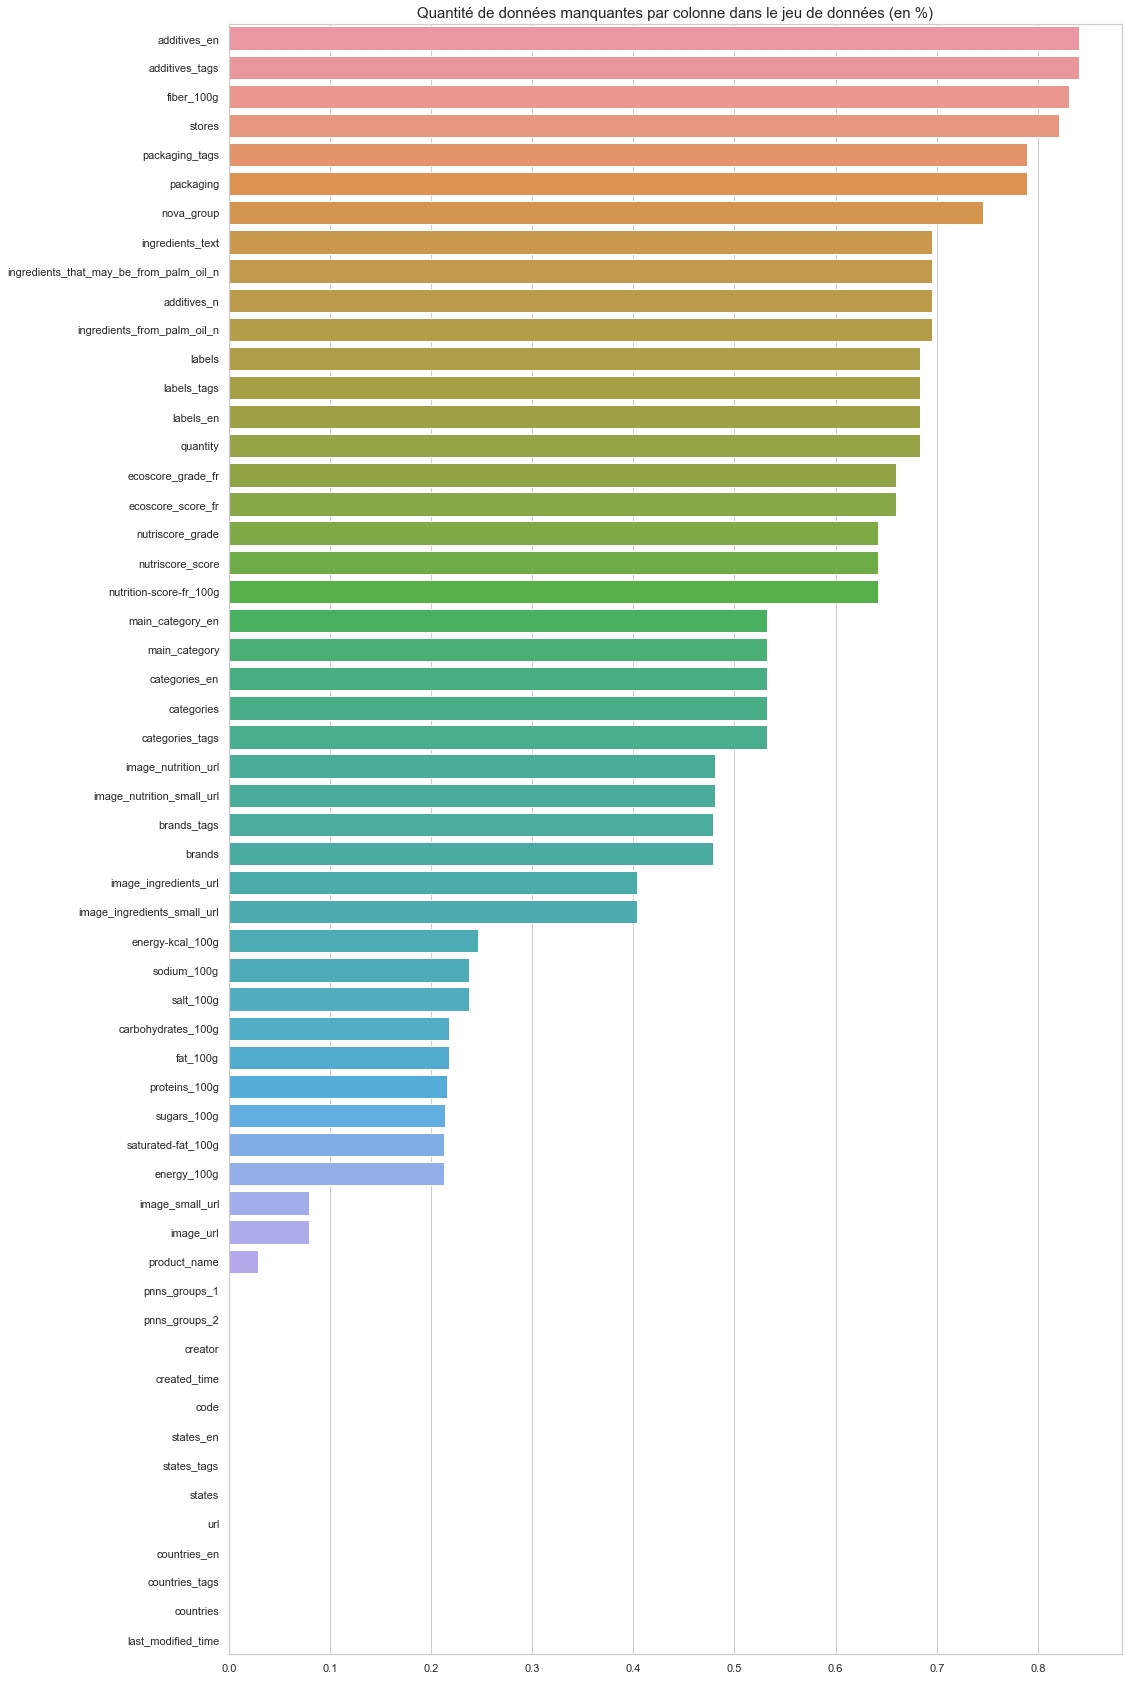

In [78]:
proportion_nan_ = data_.isna().mean().sort_values(ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan_.index, x=proportion_nan_.values)
#ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

In [132]:
float_ind=data_.columns[data_.dtypes=='float64'].to_list()

#### Supression des outlier. 

In [133]:
def outliers_percentile(data_frame):
    #for column in data_frame.select_dtypes(include=['int32','float64'])
    for column in float_ind: # supprimer les outlier selon les centiles 
        data_frame.loc[data_frame[column]>data_frame[column].quantile(0.99)]=np.nan
        #data_frame.loc[data_[column] <data_[column].quantile(0.005)]=np.nan
        #data_frame.loc[data_[column] < 0]=np.nan
    return data_frame
data_= outliers_percentile(data_)

### Analyse Univariè

#### Notre idée d'application: calcul du nutriscore demande 3 types de nutriment:
1. nutriments défavorables comme sucre, Graisse saturés, energie, sodium, sel...
2. nutriments favorable: fibres, fruits légumes, protiéne.... 
3. exceptions: café, thé , boisson alcolisées, herbe aromatisé... 

#### On cherche ces nutriments par mots clé dans les colonnes de la base nettoyée 

#### 1. Nutriment défavorable. 

In [26]:
data_.columns[data_.columns.str.contains('sugar')==True]

Index(['sugars_100g'], dtype='object')

In [57]:
data['sugars_100g'].describe()

count    1.457300e+06
mean     1.326021e+01
std      3.011010e+01
min     -1.000000e+00
25%      6.000000e-01
50%      3.570000e+00
75%      1.800000e+01
max      2.700000e+04
Name: sugars_100g, dtype: float64

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

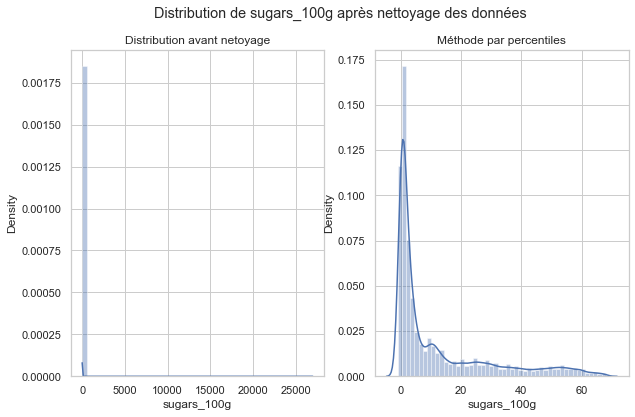

In [90]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de sugars_100g après nettoyage des données")

ax1 = sns.distplot(data["sugars_100g"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_outliers["sugars_100g"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

In [28]:
data_.columns[data_.columns.str.contains('energy')==True] # variable sugar

Index(['energy-kcal_100g', 'energy_100g'], dtype='object')

In [29]:
data[['energy-kcal_100g', 'energy_100g']].corr()
#sns.heatmap(data[['energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
#       'energy-from-fat_100g']].corr)
# valeurs manquantes 

,energy-kcal_100g,energy_100g
energy-kcal_100g,1.0,1.0
energy_100g,1.0,1.0


<AxesSubplot:>

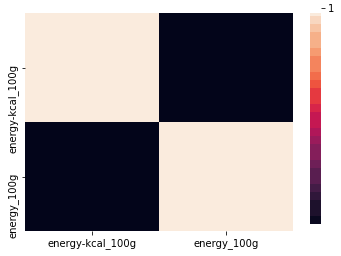

In [22]:
sns.heatmap(data[['energy-kcal_100g', 'energy_100g']].corr())

In [23]:
data[['energy-kcal_100g', 'energy_100g']].isna().mean()

energy-kcal_100g    0.232744
energy_100g         0.205503
dtype: float64

In [36]:
data[['energy-kcal_100g', 'energy_100g']].describe()

,energy-kcal_100g,energy_100g
count,1.466606e+06,1.518678e+06
mean,5.988634e+06,4.389053e+36
std,7.179236e+09,5.408835e+39
min,0.000000e+00,0.000000e+00
25%,1.000000e+02,4.180000e+02
50%,2.600000e+02,1.083000e+03
75%,4.000000e+02,1.674000e+03
max,8.693855e+12,6.665559e+42


forte correlation entre les variables 'energy-kcal_100g', 'energy_100g' on selectionne energy_100g celle avec moins de valeurs manquantes energy_100g.

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

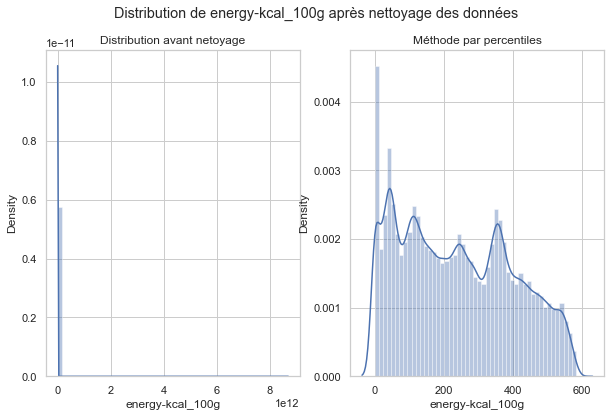

In [99]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de energy-kcal_100g après nettoyage des données")

ax1 = sns.distplot(data['energy-kcal_100g'].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_['energy-kcal_100g'].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

In [91]:
data_.columns[ data_.columns.str.contains('fat')==True ]

Index(['fat_100g', 'saturated-fat_100g'], dtype='object')

In [93]:
data_[['fat_100g', 'saturated-fat_100g']].describe()

,fat_100g,saturated-fat_100g
count,435376.000000,439032.000000
mean,11.231062,4.555200
std,11.469390,5.942409
min,0.000000,0.000000
25%,1.000000,0.200000
50%,7.200000,1.800000
75%,19.900000,6.900000
max,48.000000,23.000000


In [95]:
data_[['fat_100g', 'saturated-fat_100g','nutrition-score-fr_100g']].corr()

,fat_100g,saturated-fat_100g,nutrition-score-fr_100g
fat_100g,1.000000,0.809787,0.686638
saturated-fat_100g,0.809787,1.000000,0.672857
nutrition-score-fr_100g,0.686638,0.672857,1.000000


In [96]:
data_[['fat_100g', 'saturated-fat_100g']].isna().mean()

fat_100g              0.356535
saturated-fat_100g    0.351132
dtype: float64

On selectionne ici saturated-fat_100g et fat_100g sont très proche en terme d'impacte sur le nutriscore ou en terme de valeurs manquante. dans ce cas on choisit la graisse saturée par 100g qui logiquement impacte négativement le grade du nutriscore. 

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

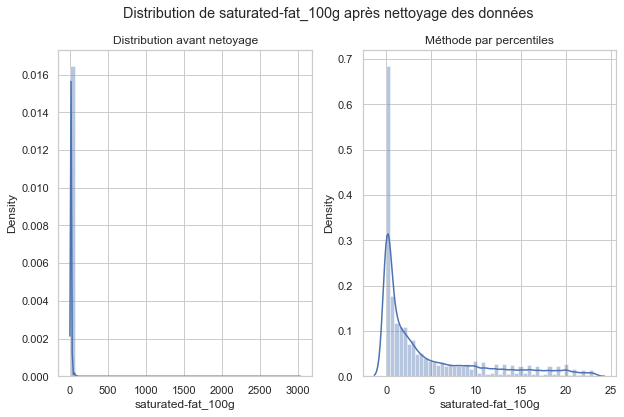

In [97]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de saturated-fat_100g après nettoyage des données")

ax1 = sns.distplot(data["saturated-fat_100g"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["saturated-fat_100g"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

In [42]:
data_.columns[data_.columns.str.contains('sodium')==True]

Index(['sodium_100g'], dtype='object')

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'après nettoyage')

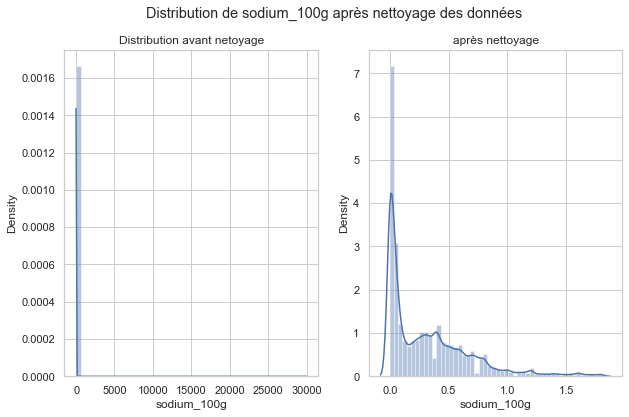

In [100]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de sodium_100g après nettoyage des données")

ax1 = sns.distplot(data["sodium_100g"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["sodium_100g"].dropna(), ax=axes[1])
ax2.set_title("après nettoyage")

Additive par produit

In [61]:
data_['additives_n'].describe()

count    106596.000000
mean     1.157267     
std      1.586553     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      2.000000     
max      6.000000     
Name: additives_n, dtype: float64

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

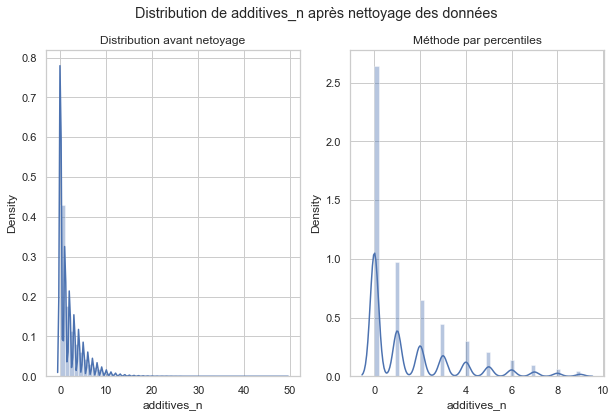

In [101]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de additives_n après nettoyage des données")

ax1 = sns.distplot(data["additives_n"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["additives_n"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

([<matplotlib.patches.Wedge at 0x23dde89c760>,
 [Text(-0.08465981667132415, 1.0967373046637823, '0.0'),
  Text(-0.8511926568915653, -0.6967575337618375, '1.0'),
  Text(0.025932859584091156, -1.0996942696921685, '2.0'),
  Text(0.6592903264464073, -0.8805318083148331, '3.0'),
  Text(0.9527089586159959, -0.5498596549782724, '4.0'),
  Text(1.0652774481869722, -0.27419693357923053, '5.0'),
  Text(1.0972103428386997, -0.0782908907075616, '6.0')],
 [Text(-0.04617808182072226, 0.5982203479984266, '52.5%'),
  Text(-0.4642869037590356, -0.3800495638700931, '16.9%'),
  Text(0.014145196136776993, -0.5998332380139101, '12.0%'),
  Text(0.35961290533440393, -0.4802900772626362, '7.7%'),
  Text(0.5196594319723614, -0.29992344816996674, '5.2%'),
  Text(0.5810604262838029, -0.14956196377048936, '3.5%'),
  Text(0.5984783688211088, -0.042704122204124506, '2.3%')])

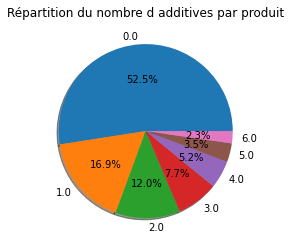

In [67]:
plt.title('Répartition du nombre d additives par produit')
plt.pie(data_.groupby("additives_n").count()["code"], 
        labels = data_.groupby("additives_n").count()["code"].index

,  autopct='%1.1f%%',shadow=True)


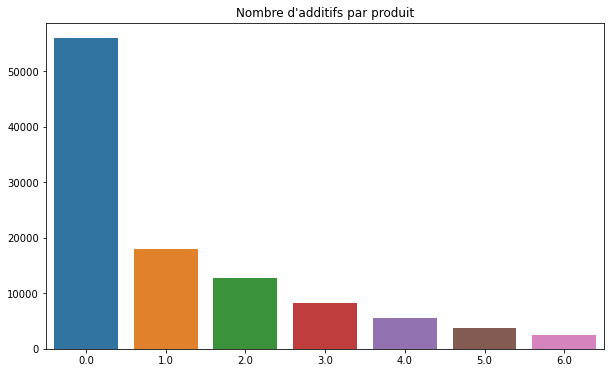

In [102]:
plt.figure(figsize=(10,6))
plt.title('Nombre d\'additifs par produit' )
sns.barplot(x=data_["additives_n"].dropna().value_counts().index
,y= data_["additives_n"].dropna().value_counts().values    )
plt.show()

ce feature est qualitative. la plupart des produits est sans additives 

In [27]:
data_.columns[data_.columns.str.contains('palm')==True]

Index(['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'], dtype='object')

In [28]:
data[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].isna().mean()

ingredients_from_palm_oil_n                0.623365
ingredients_that_may_be_from_palm_oil_n    0.623365
dtype: float64

In [74]:
data[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].corr()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
ingredients_from_palm_oil_n,1.000000,0.142073
ingredients_that_may_be_from_palm_oil_n,0.142073,1.000000


<AxesSubplot:>

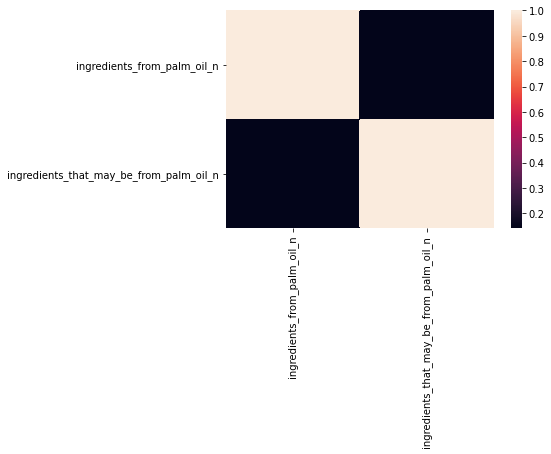

In [31]:
sns.heatmap(data[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].corr())

In [47]:
 data_['ingredients_that_may_be_from_palm_oil_n'].value_counts()

0.0    99760
1.0    6836 
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

In [48]:
data_['ingredients_that_may_be_from_palm_oil_n'].value_counts() # variable qualitative oui ou non 

0.0    99760
1.0    6836 
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

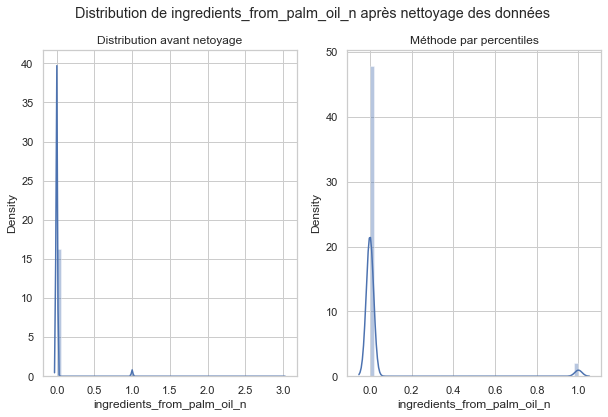

In [136]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de ingredients_from_palm_oil_n après nettoyage des données")

ax1 = sns.distplot(data["ingredients_from_palm_oil_n"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["ingredients_from_palm_oil_n"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

([<matplotlib.patches.Wedge at 0x1c241017eb0>,
 [Text(-1.0905032977401412, 0.14423091769061536, '0.0'),
  Text(1.0905032977401412, -0.144230917690615, '1.0')],
 [Text(-0.5948199805855315, 0.07867140964942655, '95.8%'),
  Text(0.5948199805855315, -0.07867140964942634, '4.2%')])

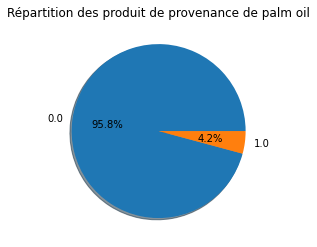

In [34]:
plt.title('Répartition des produit de provenance de palm oil')
plt.pie(data_.groupby("ingredients_from_palm_oil_n").count()["code"], 
        labels = data_.groupby("ingredients_from_palm_oil_n").count()["code"].index

,  autopct='%1.1f%%',shadow=True)

0 not from palm oil; 1: from palm oil 

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

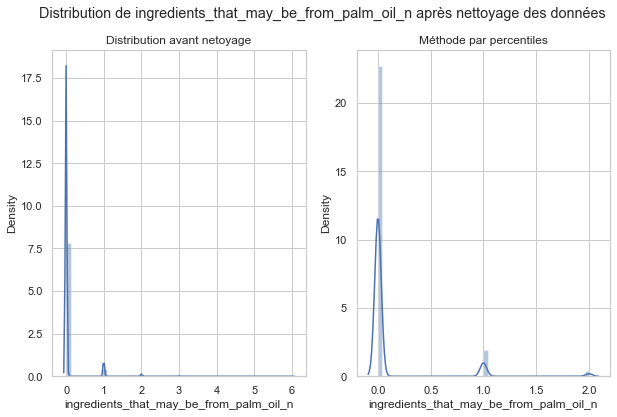

In [137]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de ingredients_that_may_be_from_palm_oil_n après nettoyage des données")

ax1 = sns.distplot(data["ingredients_that_may_be_from_palm_oil_n"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["ingredients_that_may_be_from_palm_oil_n"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

([<matplotlib.patches.Wedge at 0x1c20ee699d0>,
 [Text(-1.0552272132541587, 0.31063729397460094, '0.0'),
  Text(1.03979583399838, -0.35892147274802816, '1.0'),
  Text(1.0988320505758342, -0.05067666748423126, '2.0')],
 [Text(-0.5755784799568138, 0.16943852398614595, '90.9%'),
  Text(0.5671613639991163, -0.1957753487716517, '7.6%'),
  Text(0.5993629366777277, -0.027641818627762504, '1.5%')])

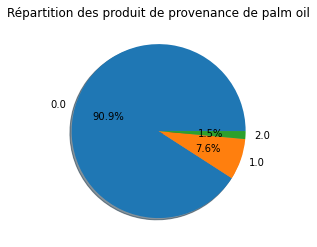

In [35]:
plt.title('Répartition des produit de provenance de palm oil')
plt.pie(data_.groupby("ingredients_that_may_be_from_palm_oil_n").count()["code"], 
        labels = data_.groupby("ingredients_that_may_be_from_palm_oil_n").count()["code"].index , autopct='%1.1f%%',shadow=True)

In [92]:
data_.columns[data_.columns.str.contains('salt')==True]

Index(['salt_100g'], dtype='object')

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

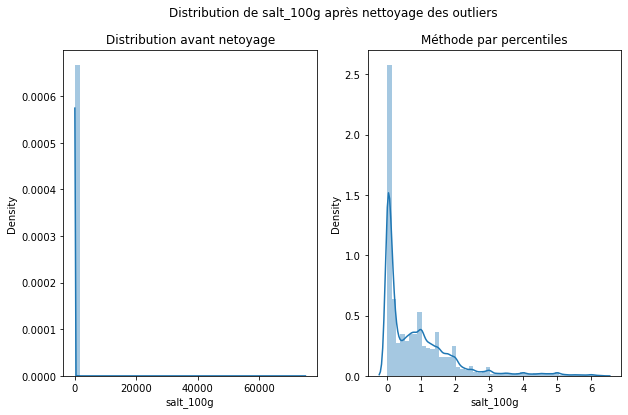

In [37]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de salt_100g après nettoyage des outliers")

ax1 = sns.distplot(data["salt_100g"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")

ax2 = sns.distplot(data_["salt_100g"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

#### Nutriment favorable 

In [26]:
data_.columns[data_.columns.str.contains('fib')==True]

Index(['fiber_100g'], dtype='object')

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

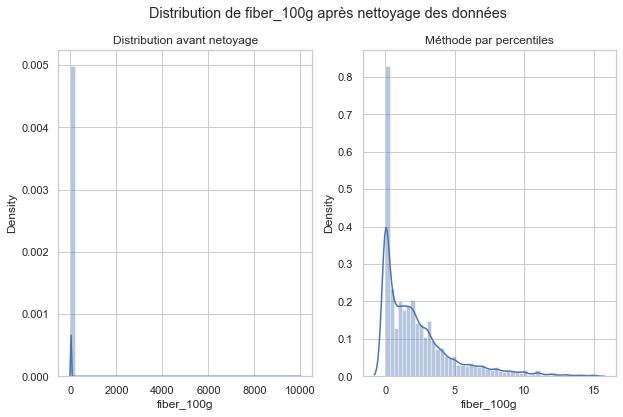

In [106]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de fiber_100g après nettoyage des données")

ax1 = sns.distplot(data["fiber_100g"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["fiber_100g"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

Ces variable est qualitative 0= False 1= True est c'est interessant d'introduire ces variables dans notre analyse. 

In [32]:
data_.columns[data_.columns.str.contains('prot')==True]

Index(['proteins_100g'], dtype='object')

In [51]:
data_[['proteins_100g', ]].describe()

,proteins_100g
count,279680.000000
mean,6.882637
std,6.521454
min,0.000000
25%,1.000000
50%,5.200000
75%,11.000000
max,23.500000


C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

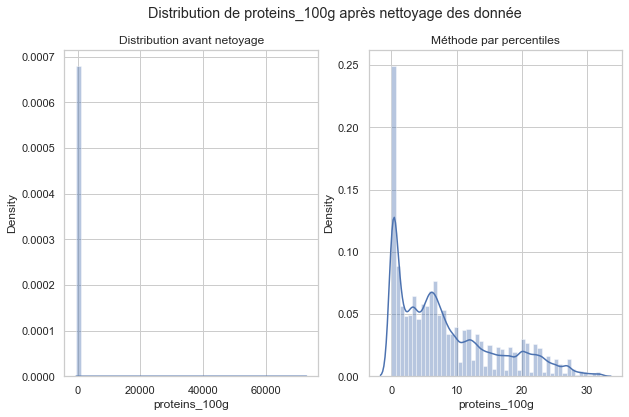

In [107]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de proteins_100g après nettoyage des donnée")

ax1 = sns.distplot(data["proteins_100g"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["proteins_100g"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

In [103]:
data_.columns[data_.columns.str.contains('fiber')==True]

Index(['fiber_100g'], dtype='object')

In [104]:
data[['fiber_100g']].isna().mean()

fiber_100g    0.747284
dtype: float64

Trop de valeurs manquantes pour ces variables. ces variables ne seront pas selectionnées. 

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

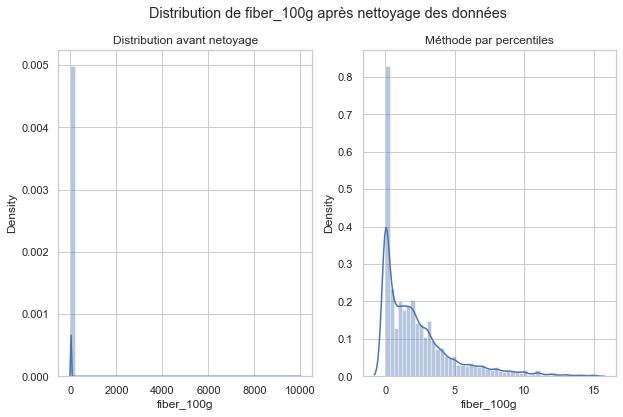

In [105]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de fiber_100g après nettoyage des données")

ax1 = sns.distplot(data["fiber_100g"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)

ax2 = sns.distplot(data_["fiber_100g"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

In [57]:
data_[['fiber_100g']].describe()

,fiber_100g
count,59024.000000
mean,1.871371
std,1.940008
min,0.000000
25%,0.100000
50%,1.400000
75%,2.900000
max,8.500000


In [ ]:
data_.columns[data_.columns.str.contains('palm')==True]

#### 3ème catégorie de variable celui des exeptions selon categories 

In [40]:
data_['categories'].isna().mean()

0.5750045816509314

3ème type categorie et les exeptions 

Exploration de la variable categorie pour chercher eventuellement des catégorie d'exeptions "Caffé, thé ,herbes_aromatisé, boisson allcolisés.. 

In [139]:
the=data[data['categories'].str.contains('Thé')==True]['categories']
alcool=data[data['categories'].str.contains('Alcools')==True]['categories']
cafe=data[data['categories'].str.contains('café')==True][['categories']]
data_exep=data_[~data_['categories'].isin([cafe,alcool,the])]


In [ ]:
data_.shape

In [ ]:
data_exep.shape 

In [122]:
data_.to_csv('C:/Users/maido/Desktop/CentralSuplec/P3_Santé_Public/data_cleaned.csv', index=False)

### Premiere selection de variables 

In [57]:
data_selected=data_[['proteins_100g','ingredients_that_may_be_from_palm_oil_n','additives_n','ingredients_from_palm_oil_n',
                     'fiber_100g','saturated-fat_100g','energy_100g','sugars_100g','nutrition-score-fr_100g']]

In [44]:
data_.shape

(676612, 58)

In [116]:
data_selected.shape

(676612, 9)

In [108]:
data_.shape

(676612, 58)

In [126]:
data.shape

(1867885, 184)

On a passé de 184 colonnes à 58 colonnes 

#### Exploration du nutriscore

In [111]:
data[['nutriscore_score','nutrition-score-fr_100g']].describe() # la note 

,nutriscore_score,nutrition-score-fr_100g
count,687210.000000,687215.000000
mean,9.125697,9.125754
std,8.869307,8.869310
min,-15.000000,-15.000000
25%,1.000000,1.000000
50%,10.000000,10.000000
75%,16.000000,16.000000
max,40.000000,40.000000


In [100]:
data['nutriscore_score'].describe()

count    699450.000000
mean     9.118109     
std      8.855767     
min     -15.000000    
25%      1.000000     
50%      10.000000    
75%      16.000000    
max      40.000000    
Name: nutriscore_score, dtype: float64

In [109]:
data[['nutriscore_score','nutrition-score-fr_100g']].isna().mean() # l'idée d'application remplir les nan 

nutriscore_score           0.632092
nutrition-score-fr_100g    0.632089
dtype: float64

In [110]:
data[['nutriscore_score','nutrition-score-fr_100g']].corr()

,nutriscore_score,nutrition-score-fr_100g
nutriscore_score,1.0,1.0
nutrition-score-fr_100g,1.0,1.0


ces 2 variables est la même chose on garde nutrition-score-fr_100g avec un peu moins de valeurs manquantes

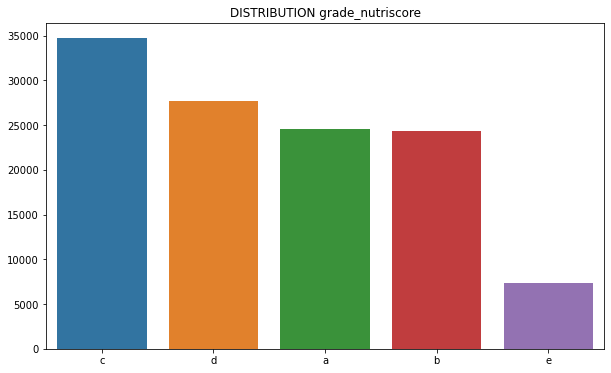

In [105]:
# DISTRIBUTION grade_nutriscore
plt.figure(figsize=(10,6))
plt.title('DISTRIBUTION de grade_nutriscore' )
sns.barplot(x=data_["nutriscore_grade"].dropna().value_counts().index
,y= data_["nutriscore_grade"].dropna().value_counts().values    )
plt.show()

([<matplotlib.patches.Wedge at 0x23db4579dc0>,
 [Text(0.8747148300076257, 0.6669887301632096, 'a'),
  Text(-0.40405772736504797, 1.0231018292216043, 'b'),
  Text(-1.0259663721965964, -0.396727870361732, 'c'),
  Text(0.4786260072734311, -0.9904126135916757, 'd'),
  Text(1.0793338735121747, -0.21222249995984127, 'e')],
 [Text(0.4771171800041594, 0.3638120346344779, '20.7%'),
  Text(-0.22039512401729885, 0.5580555432117841, '20.5%'),
  Text(-0.5596180211981434, -0.21639702019730836, '29.3%'),
  Text(0.26106873124005325, -0.5402250619590957, '23.3%'),
  Text(0.5887275673702771, -0.11575772725082249, '6.2%')])

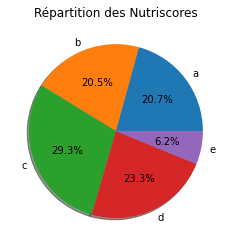

In [107]:
plt.title('Répartition des Nutriscores')
plt.pie(data_.groupby("nutriscore_grade").count()["code"], 
        labels = data_.groupby("nutriscore_grade").count()["code"].index

,  autopct='%1.1f%%', shadow=True)


In [41]:
data.dtypes

code                                          object 
url                                           object 
creator                                       object 
created_t                                     int64  
created_datetime                              object 
last_modified_t                               int64  
last_modified_datetime                        object 
product_name                                  object 
abbreviated_product_name                      object 
generic_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
packaging_text                                object 
brands                                        object 
brands_tags                                   object 
categories                                    object 
categories_tags                               object 
categories_en               

###  Réduction de dimension par ACP 

In [58]:
# maintenant inputation par knn 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
data_acp=data_selected.drop('nutrition-score-fr_100g',axis=1).dropna()

In [60]:
col_acp=data_acp.columns

In [50]:
col_acp

Index(['proteins_100g', 'ingredients_that_may_be_from_palm_oil_n',
       'additives_n', 'ingredients_from_palm_oil_n', 'fiber_100g',
       'saturated-fat_100g', 'energy_100g', 'sugars_100g', 'salt_100g'],
      dtype='object')

In [61]:
#on ramène nos données à une moyenne nulle et une variance de 1
scaler = StandardScaler()
data_acp = scaler.fit_transform(data_acp)

In [62]:
acp=PCA(n_components=data_acp.shape[1]) # le modèle 

In [66]:
acp.fit(data_acp) # fit data 

PCA(n_components=8)

In [54]:
acp.explained_variance_ratio_

array([0.24378448, 0.18576699, 0.16008715, 0.1048998 , 0.09650458,
       0.07296202, 0.05914218, 0.04970728, 0.02714552])

In [55]:
acp.singular_values_

array([438.09544513, 382.42827111, 355.01275094, 287.37768811,
       275.63837221, 239.67024649, 215.78157676, 197.82251217,
       146.18903853])

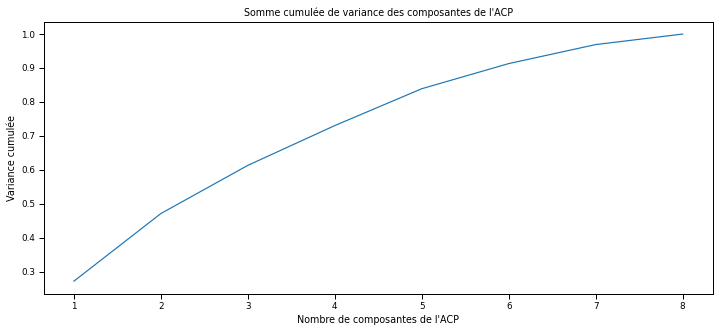

In [69]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(np.linspace(1, 8,8),
         np.cumsum(acp.explained_variance_ratio_))


On voit qu'à partir de 6 features on a une variance cumulée de plus de 95 %. On pourrait donc réduire notre jeu de données à 6 dimensions.

In [149]:
acp.components_

array([[ 0.47393757,  0.14095746,  0.30492368,  0.42990655,  0.5784381 ,
         0.10331566,  0.36393863],
       [-0.35837051,  0.13226184,  0.2800424 ,  0.04182637,  0.26365039,
         0.68668099, -0.48255764],
       [-0.1246222 ,  0.57600924, -0.62991966,  0.47247438, -0.11298268,
         0.13143079,  0.05111458],
       [-0.06503461,  0.78193059,  0.38790479, -0.40976667, -0.05138254,
        -0.23527669,  0.08933595],
       [-0.60876772, -0.13101913,  0.22366719,  0.13826859, -0.15988395,
         0.16186038,  0.70094863],
       [-0.28039258, -0.01640817,  0.35312244,  0.59432204, -0.06635336,
        -0.55356906, -0.36380648],
       [ 0.42187134,  0.04472656,  0.32650639,  0.22350227, -0.74197502,
         0.33545257, -0.02022516]])

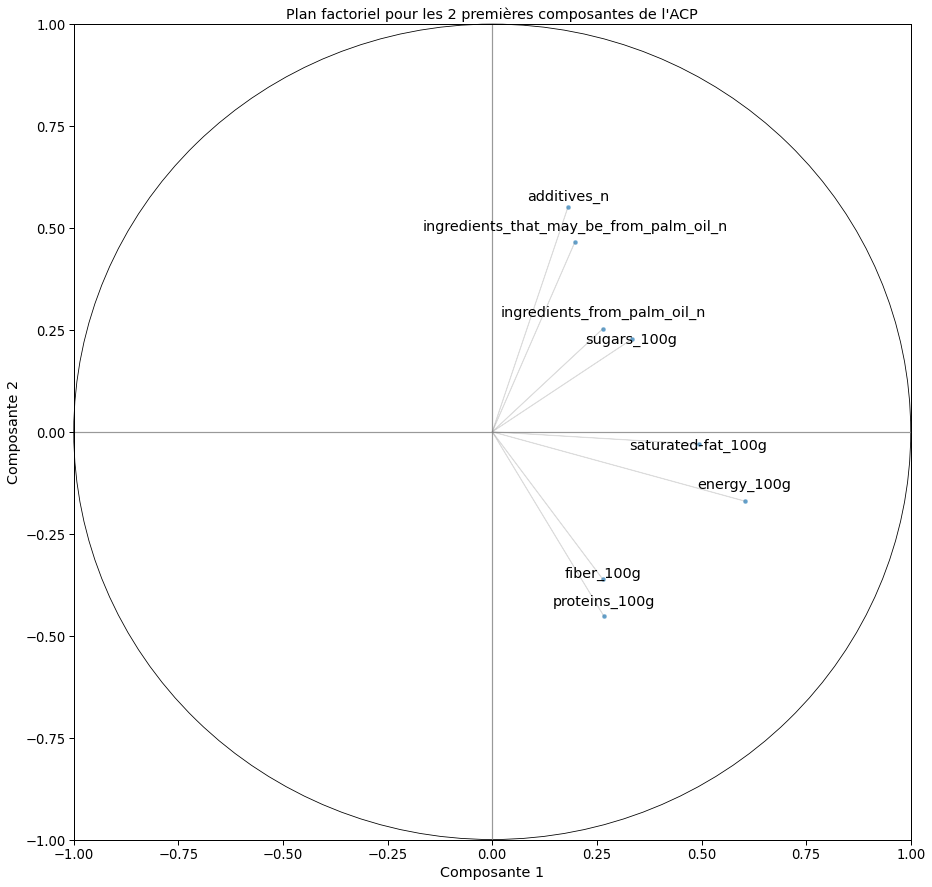

In [68]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = acp.components_[0,:]
y_pca = acp.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, col_acp):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 

In [131]:
norms = np.linalg.norm(acp.components_[0:6], axis=0)

In [132]:
normes = pd.DataFrame(norms).T

In [133]:
normes.columns = col_acp

In [134]:
normes = normes.T.reset_index()

In [135]:
norms = np.linalg.norm(acp.components_[0:6], axis=0)
normes = pd.DataFrame(norms).T
normes.columns = col_acp
normes = normes.T.reset_index()
normes.columns = ['feature', 'norme']
normes.sort_values(by='norme', inplace=True, ascending=False)

<AxesSubplot:title={'center':"Importance relative des features dans \n les 7 premières composantes de l'ACP"}, xlabel='norme', ylabel='feature'>

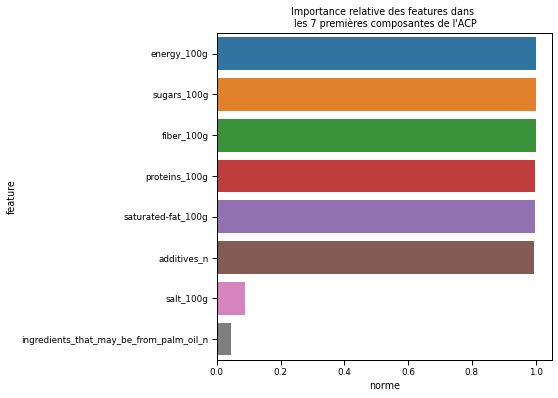

In [136]:
plt.figure(figsize=(6,6))
plt.title('Importance relative des features dans \n les 7 premières composantes de l\'ACP')
sns.barplot(y = normes['feature'],
            x = normes['norme'])

In [ ]:
data_to_clean_cleaned.to_csv('C:/Users/maido/Desktop/CentralSuplec/P3_Santé_Public/data_cleaned.csv', index=False)